In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# evaluation procedure 1: train test split on the entire dataset

In [3]:
# load the dataset
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
# train logistic regression model
logreg = LogisticRegression(solver='liblinear')
#fit the model with data
logreg.fit(X,y)

#store the predicted value in y_pred
y_pred = logreg.predict(X)

In [6]:
len(y_pred)

150

In [7]:
from sklearn.metrics import accuracy_score

In [9]:
# compute classification accuracy for the logistic regression model
print(accuracy_score(y, y_pred))

0.96


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(accuracy_score(y, y_pred))

0.9666666666666667


In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(accuracy_score(y, y_pred))

1.0


# evaluation procedure 2: Train/test split

In [13]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [14]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [15]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [16]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [17]:
# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [18]:
#STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(accuracy_score(y_test, y_pred))

0.9333333333333333


In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.95


In [21]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

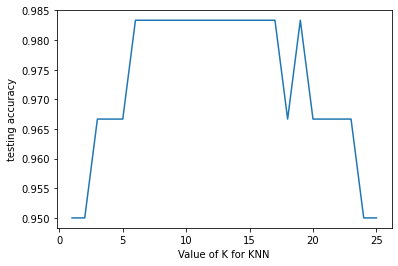

In [22]:
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("testing accuracy")
plt.show()


# Making predictions on out-of-sample data

In [23]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([[3, 5, 4, 2]])

array([1])